## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 10. Распознавание объектов. Часть II

### 1. Что вас ждёт в этом модуле?

Обнаружение объектов — неотъемлемая часть компьютерного зрения. Мы используем его для нахождения транспортных средств, наблюдения и т. д. Разница между алгоритмами обнаружения и алгоритмами классификации заключается в том, что в алгоритмах обнаружения мы пытаемся нарисовать ограничивающую рамку вокруг интересующего объекта, чтобы найти его на изображении.

⛏ На занятиях прошлого модуля вы узнали про такие задачи обнаружения объектов, как **локализация и детектирование**, разобрались, в чём их отличия, а также подробно познакомились с семейством региональных свёрточных сетей и семейством **You Only Look Once**, созданным специально для распознавания объектов.

### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- какие метрики качества используются с алгоритмами распознавания;

- в каких сферах применяются методы локализации и детектирования.

### ВЫ НАУЧИТЕСЬ:

- использовать transfer learning для обучения сетей семейства RCNN и YOLO;

- сравнивать архитектуры между собой.

МАТЕРИАЛЫ МОДУЛЯ ПОДГОТОВИЛИ:
	
ЕКАТЕРИНА ТРОФИМОВА

Стажёр-исследователь, аспирант

Научно-учебная лаборатория методов анализа больших данных, НИУ ВШЭ

Проект «Использование графовых нейронных сетей для реконструкции электромагнитных ливней в нейтринных экспериментах»

#### ПРОВЕРИМ ЗНАНИЯ!


### Задание 1.1

Какие плюсы мы получаем при использовании переноса обучения (transfer learning)?
- cокращение времени обучения
- рост производительности модели
- необходимость в меньшем объёме обучающих данных

### Задание 1.2

Как происходит перенос обучения?
- Обучается «большая» модель, веса которой потом переносятся на новую модель 

### Задание 1.3
Заполните пропуски, выбрав нужный вариант ответа из предложенных:

YOLO — ___a___ детектор, который ___b___ поиск объектов и их дальнейшую классификацию с определением размеров ограничивающих рамок. RCNN — ___c___ детектор, который ___d___ поиск объектов и их дальнейшую классификацию с определением размеров ограничивающих рамок.
- a — это одноступенчатый
- b — это объединяет
- с — это двухступенчатый
- d — это раздляет

### 2. Метрики качества моделей распознавания

Как вы уже знаете, при построении моделей обнаружения объекта мы решаем две задачи:

задачу классификации: нам необходимо определить, присутствует ли объект на изображении и класс объекта;
задачу регрессии: мы хотим прогнозировать координаты ограничивающей объект рамки.
То есть нам нужно оценить эффективность как классификации, так и регрессии ограничивающих рамок в изображении.

- Как мы измеряем производительность модели обнаружения объектов?

### INTERSECTION OVER UNION

Для обнаружения объектов используют концепцию **Intersection over Union (IoU)**. IoU вычисляет пересечение по объединению двух ограничивающих прямоугольников: истинной и предсказанной ограничивающей рамки.

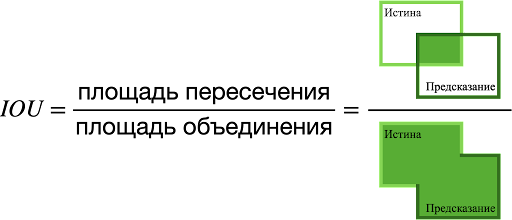

IoU, равное 1, означает, что предсказанные и истинные ограничивающие полностью совпадают. Для данной метрики нам нужно определить порог (скажем, α), который используется для определения точности обнаружения объекта.

Следовательно, мы можем классифицировать детектирование объектов на истинно положительное (True Positive, TP), ложноположительное (False Positive, FP) и ложноотрицательное (False Negative, FN) следующим образом:

- TP — для которого IoU ≥ α;

- FP — для которого IoU <α;

- FN — в случае, если на изображении присутствует объект, но модель не смогла его обнаружить; 

True Negative относится к тем частям изображения, на которых модель не обнаружила объекты. Данная метрика не является полезной для детектирования, поэтому мы будем её игнорировать.
Пороговое значение IoU устанавливается на 0,5 или больше. Его можно установить на 0,5, 0,75, 0,9 или 0,95 и т. д. Например, при пороге α = 0,5, мы можем определить TP, FP и FN, как показано на рисунке ниже.

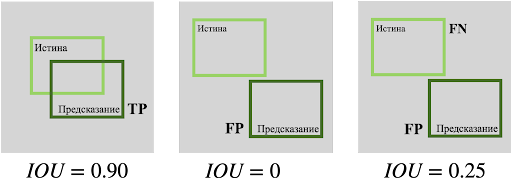

### Задание 2.1

Соотнесите изображение и метрику для порога α = 0,75 (вы можете использовать одну метрику несколько раз):

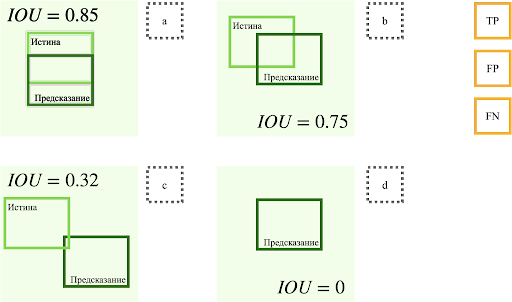

1. а — это:

TP

2. b — это:

TP

3. c — это:

FP

4. d — это:

FP




### PRECISION AND RECALL

Как мы уже отметили, True Negative (TN) нерелевантна для оценки качества в задачах распознавания. Поэтому мы будем избегать все метрики, основанные на этом элементе матрицы ошибок, а именно True Negative Rate (TNR), False Positive Rate (FPR), Negative Predictive Value (NPC) и площадь под Receiver Operating Characteristic (ROC) кривой. Вместо этого оценка моделей обнаружения объектов основывается на таких метриках, как точность (Precision) и полнота (Recall), которые определены так:

Точность и полнота рассчитываются для всех объектов, присутствующих на изображении. Идеальная модель — это модель с **FN = 0 (recall = 1) и FP = 0 (precision = 1). **

Tradeoff этих двух показателей при различном уровне достоверности заключён в графике зависимости precision от recall — кривой **Precision-Recall (PR)**. Увеличение точности приведёт к снижению полноты. И наоборот, если кто-то принимает больше положительных результатов, понижая порог IoU, полнота будет увеличиваться, но количество ложных срабатываний также может увеличиться, что в свою очередь приведёт к уменьшению точности. Для хорошей модели точность и полнота должны оставаться высокими, даже если порог достоверности меняется.

- Можно ли получить метрику, учитывающую как precision, так и recall?

**Average precision (AP)** — площадь под кривой PR (AUC-PR). В CV используется нотация APα, которая означает среднюю точность (AP) при пороге IoU α. Например, AP50 и A75 означают AP с порогом IoU, равным 50 % и 75 % соответственно.

Высокий AUC-PR подразумевает высокий уровень точности и полноты. Часто кривая PR представляет собой зигзагообразный график (не монотонно убывающий), например, по причине нехватки данных. Мы хотим убрать это поведение (сделать кривую монотонно убывающей) перед вычислением площади под кривой (AP). Это возможно с помощью методов интерполяции. Давайте на примере рассмотрим метод 11-точечной интерполяции, который представляет собой построение графика интерполированных оценок точности для результатов модели на 11 равномерно распределённых значениях полноты, от 0.0 до 1.0. 

Предположим, у нас есть следующий график Precision-Recall:

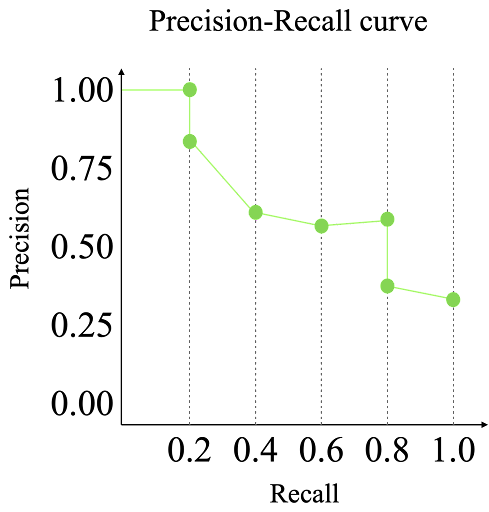

Recall	Precision
0.2	1.0
0.2	0.8
0.4	0.6
0.6	0.57
0.8	0.59
0.8	0.40
1.0	0.35   

11-точечная интерполяция будет использовать максимальное значение точности для каждого значения полноты. Мы создаём 11 равномерно распределённых уровней полноты 0.0, 0.1, 0.2, … 0.9, 1.0.

Полнота 0.2 имеет наивысшее значение точности 1.0. Когда полнота равна 0.6, у нас есть значение точности 0.5, но для полноты 0.8 мы видим более высокое значение точности 0.59. Исходя из определения 11-точечной интерполяции, мы берём максимум из всех будущих точек, поэтому точность, которую нам нужно учитывать, составляет 0.59 вместо 0.57. Для полноты 1.0 мы берем максимальную точность, равную 0,35.

Recall	Interpolated Precision
0.0	1.0
0.1	1.0
0.2	1.0
0.3	1.0
0.4	0.6
0.5	0.6
0.6	0.59
0.7	0.59
0.8	0.59
0.9	0.59
1.0	0.35   

Показатель средней AP (Mean Average Precision, mAP) в данном случае равен (1+1+1+1+0.6+0.6+0.59+0.59+0.59+0.59+0.59+0.35)/11 = 0.72.

### Задание 2.2

Оцените показатель mAP для следующих данных точности и полноты. Ответ округлите до двух знаков после запятой.
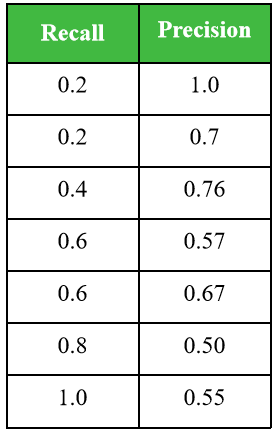

(1+0.7+0.76+0.57+0.67+0.5+0.55)/7 = 0.68

mAP рассчитывается для каждого класса объекта. Если мы хотим рассчитать mAP для нескольких классов, можно просто взять среднее полученных значений для разных классов.  

⛏ Итак, мы рассмотрели метрики AP и MAP. Мы также узнали, что эти метрики определяются за счёт установки порога на основе IoU. AP рассчитывается для разных пороговых значений IoU. А средним значением результирующих значений AP является mAP.

В следующем юните мы научимся обучать модели распознавания объектов, используя перенос обучения, и применим изученные метрики для сравнения качества моделей.

### Задание 2.3

Выберите правильную формулу для IoU:
- Отношение площади пересечения к площади объединения верно

### 3. Использование переноса обучения для распознавания объектов

⛏ В этом юните мы узнаем, как использовать transfer learning для обучения детекторов объектов.

В качестве датасета мы будем использовать набор данных PASCAL Visual Object Classes (VOC). Напомним, что этот набор включает 20 классов размеченных изображений, заключённых в ограничивающие рамки. Нашей задачей станет построение набора ограничивающих рамок для каждого интересующего класса объектов, присутствующих на изображении.

Ниже приведён пример того, что мы хотим получить:

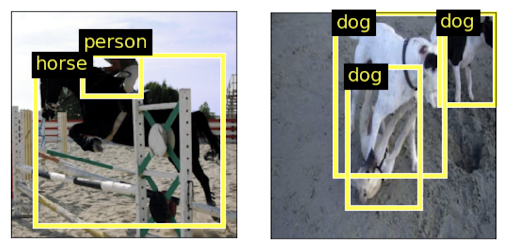

Особый интерес нашей практики заключается в том, как мы вычислим признаки, с помощью которых будет осуществляться детектирование объектов. 

Мы будем использовать предварительно обученную на датасете ImageNet модель ResNet в качестве экстрактора признаков.

Напомним, что ResNet позволяет обучать до сотен или даже тысяч слоев нейронной сети и при этом обеспечивает отличную производительность.

Давайте перейдём к практической части и, используя transfer learning, обучим модель faster-RCNN на датасете Pascal VOC. 

### ОБУЧЕНИЕ МОДЕЛИ FASTER-RCNN

В данном видео используется этот ноутбук:

СКАЧАТЬ НОУТБУК: https://github.com/luhakv/cv_engr/blob/master/CV_md12_1_screencast.ipynb  

⛏ Итак, вы знаете, как использовать перенос обучения для задачи распознавания на примере RCNN. Как вы поняли, двухступенчатые детекторы обучаются сравнительно долго, но при этом дают хорошее качество.

### 4. Финальное задание

Теперь давайте обучим модель YOLOv5. YOLO, или You Only Look Once, — широко используемый алгоритм обнаружения объектов на основе глубокого обучения. YOLOv5 — одна из последних версий данного алгоритма.

Здесь вам также предлагается использовать transfer learning. Вместо того чтобы начинать со случайным образом инициализированных весов, вы можете начать с модели, которая уже находится в довольно хорошей форме.

Вам понадобится знакомый ноутбук: https://github.com/luhakv/cv_engr/blob/master/CV_md12_1_screencast.ipynb

В качестве ответа необходимо загрузить ваш ноутбук в форму ниже.

Ментор оценит работу по следующим критериям:

1 балл	Данные загружены с помощью DataLoader
1 балл	Используется предобученная модель
1 балл	Обучение происходит на обучающей выборке
1 балл	accuracy на валидационной выборке > 0.85
1 балл	Результаты модели на валидационной выборке визуализированы
1 балл	Приведено сравнение с faster rcnn

Решение: https://github.com/luhakv/cv_engr/blob/master/module10_final.ipynb

### 5. Сферы применения алгоритмов распознавания

Сценарии использования, связанные с обнаружением объектов, очень разнообразны; существует почти неограниченное количество способов сделать компьютеры похожими на людей, автоматизировать ручные задачи или создавать новые продукты и услуги на базе искусственного интеллекта.

Сегодня распознавание объектов лежит в основе большинства программ ИИ и программ, основанных на машинном зрении. Вы наверняка слышали о применении алгоритмов распознавания в автомобильной сфере, например о беспилотных автомобилях. Одна из задач таких алгоритмов — распознавание пешеходов, дорожных знаков и других транспортных средств. Также вы могли слышать об использовании детекторов объектов для анализа дорожного движения или обнаружения транспортных средств, останавливающихся в опасных зонах — на перекрёстках или шоссе.

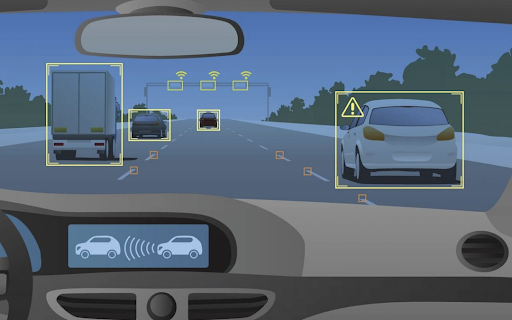
Источник изображения (https://www.vesttech.com/top-3-possible-dangers-of-self-driving-cars/)  

Помимо этого, детекторы объектов активно применяются в розничной торговле. Так, стратегически размещённые системы подсчёта людей во многих розничных магазинах используются для сбора информации о том, как покупатели проводят своё время в торговой точке, и об их посещаемости. Анализ клиентов с помощью камер помогает оптимизировать планировку магазина и повысить уровень продаж. Более того, детекторы позволяют выявить очереди, сокращая время ожидания в магазинах.

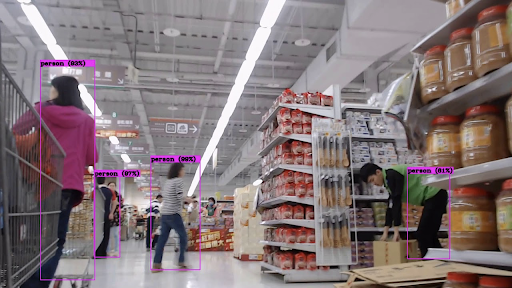
Источник изображения (https://www.youtube.com/watch?v=IfhWUgR3N28&ab_channel=KevinLin)  

В сельском хозяйстве детекторы реального времени (YOLO) используются для борьбы с насекомыми-вредителями, а также для мониторинга животных.

В спортивной индустрии распознавание объектов даёт возможность провести объективную оценку спортсменов на соревнованиях.  Автоматическое распознавание движений  во время плавания, бега и т. д. преодолевает ограничения, связанные с ручными методами анализа результатов. 

Обнаружение объектов позволило сделать множество прорывов в медицинском сообществе. Поскольку медицинская диагностика в значительной степени зависит от изучения сканированных изображений и фотографий, обнаружение объектов с использованием компьютерной и магнитно-резонансной томографии чрезвычайно облегчает диагностику заболеваний, например благодаря алгоритмам CV для обнаружения опухолей.

### ВОПРОСЫ ДЛЯ РАЗМЫШЛЕНИЯ

1. Как можно применить детекторы объектов в вашей области исследования/сфере деятельности?

2. Как вы думаете, могут ли применяться детекторы для поиска внеземных цивилизаций?

### 6. Итоги. Закрепление знаний

В этом модуле вы познакомились с метриками качества алгоритмов локализации и детектирования, а также научились использовать технику переноса для обучения современных моделей распознавания объектов.

Вы узнали:

- какие метрики качества подходят для задач локализации и детектирования;
- как использовать перенос для обучения одноуровневых и двухуровневых детекторов;
- как обучить детектор в режиме реального времени;
- в каких сферах применяются рассмотренные алгоритмы распознавания.  

Для закрепления теоретического материала ответьте на несколько вопросов ниже ↓

### Задание 6.1

Какие метрики являются релевантными для задачи детектирования объектов?
- PRAUC (AP)
- FN

### Задание 6.2

Метрика mAP рассчитывается для всех классов объектов одновременно^
- Ложь

### Задание 6.3
Выберите верные утверждения:
- Предобученная модель используется в качестве экстрактора признаков для детектирования объектов
- Семейство YOLO превосходит семейство RCNN в скорости

### Задание 6.4

Сколько параметров обучается на слое pooling?
- 0

### Задание 6.5

Как правило, pooling имеет набор гиперпараметров, описывающих размер фильтра и длину шага, которые задаются и работают как фиксированное вычисление. Назовите метод, который можно использовать для оценки модели локализации объекта.
- IoU

### Задание 6.6

Чтобы извлечь несколько признаков из изображения, обычно используют несколько фильтров, а затем складывают их, чтобы сформировать результат. Допустим, есть свёртка 10x10x3, полученная с использованием десяти фильтров размером 5x5x3. Посчитайте, сколько параметров необходимо изучить, чтобы сформировать только фильтры.
- 750  

_(Пояснение: Каждый фильтр 5x5x3 имеет 5 * 5 * 3 = 75 признаков. Следовательно, для десяти таких фильтров общее количество признаков будет 75 * 10 = 750)_

### ВОПРОС ДЛЯ РАЗМЫШЛЕНИЯ

На чём основан современный алгоритм обнаружения объектов YOLO?  

- YOLO — это алгоритм обнаружения объектов, основанный на свёрточной нейронной сети и способный работать в режиме реального времени. Он обеспечивает точное обнаружение большого количества различных объектов и может использоваться в качестве отправной точки переноса обучения для многих проблем компьютерного зрения.